<a href="https://colab.research.google.com/github/AdilPasha2/CODSOFT/blob/main/Task2Credit_card_fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE



In [3]:
df_train = pd.read_csv('fraudTrain.csv')
df_test = pd.read_csv('fraudTest.csv')


In [4]:
df = pd.concat([df_train, df_test])


In [5]:
print(df.head())
print(df.info())
print(df.describe())
print(df['is_fraud'].value_counts())

   Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ...      lat      long  \
0    Banks      F                561 Perry Cove  ...  36.0788  -81.1781   
1     Gill      F  43039 Riley Greens Suite 393  ...  48

In [6]:
df.drop(['trans_date_trans_time', 'cc_num', 'first', 'last', 'street',
         'dob', 'merchant', 'merch_lat', 'merch_long', 'unix_time',
         'trans_num', 'lat', 'long'], axis=1, inplace=True)

In [7]:
df = pd.get_dummies(df, drop_first=True)


In [8]:
df.isnull().sum()

,0
Unnamed: 0,0
amt,0
zip,0
city_pop,0
is_fraud,1
...,...
job_Water engineer,0
job_Water quality scientist,0
job_Web designer,0
job_Wellsite geologist,0


In [9]:
X = df.drop('is_fraud', axis=1)
y = df['is_fraud']

<Axes: xlabel='is_fraud'>

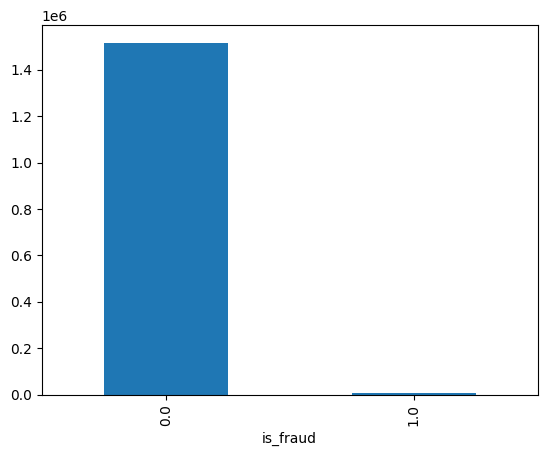

In [10]:
df.groupby("is_fraud").count()["Unnamed: 0"].plot(kind = "bar") # Use a column that exists in the DataFramedf.groupby("is_fraud").count()["Unnamed: 0"].plot(kind = "bar") # Use a column that exists in the DataFrame

In [11]:
fraud = df[df["is_fraud"] == 1]
not_fraud =  df[df["is_fraud"] == 0]
print(fraud.shape[0])
print(not_fraud.shape[0])

7648
1516742


In [13]:
not_fraud = not_fraud.sample(fraud.shape[0], random_state = 42)
df_new = pd.concat([fraud, not_fraud])

<Axes: xlabel='is_fraud'>

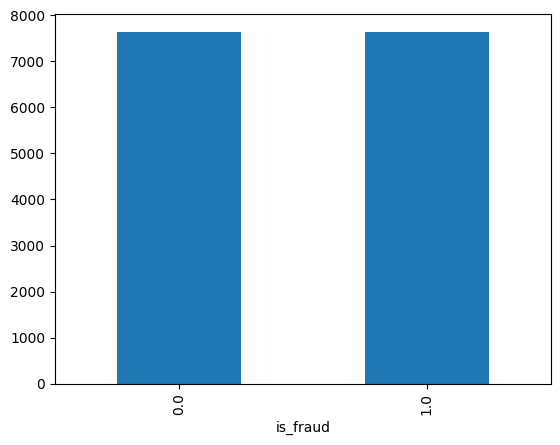

In [15]:
df_new.groupby("is_fraud").count()['Unnamed: 0'].plot(kind = "bar") # Use a column that exists in the DataFrame

In [16]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15296 entries, 2449 to 64872
Columns: 1451 entries, Unnamed: 0 to job_Writer
dtypes: bool(1446), float64(2), int64(3)
memory usage: 21.8 MB


In [23]:
df_new.drop_duplicates()

,amt,zip,city_pop,is_fraud,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,...,job_Video editor,job_Visual merchandiser,job_Volunteer coordinator,job_Warden/ranger,job_Waste management officer,job_Water engineer,job_Water quality scientist,job_Web designer,job_Wellsite geologist,job_Writer
2449,281.06,28611,885,1.0,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2472,11.52,78208,1595797,1.0,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2523,276.31,78208,1595797,1.0,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2546,7.03,28611,885,1.0,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2553,275.73,78208,1595797,1.0,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567614,5.23,15486,2303,0.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
943757,46.17,75048,20328,0.0,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
270649,25.90,48438,6951,0.0,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
762044,11.62,95827,757530,0.0,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [28]:
numeric_columns = [i for i in df_new.columns if df_new[i].dtype == 'int64' or df_new[i].dtype =='int32' or df_new[i].dtype =='float64']
categorical_columns = [i for i in df_new.columns if df_new[i].dtype == 'object']

In [30]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
encoder = LabelEncoder()
for col in categorical_columns:
    df_new[col] = encoder.fit_transform(df_new[col])
df_new

,amt,zip,city_pop,is_fraud,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,...,job_Video editor,job_Visual merchandiser,job_Volunteer coordinator,job_Warden/ranger,job_Waste management officer,job_Water engineer,job_Water quality scientist,job_Web designer,job_Wellsite geologist,job_Writer
2449,281.06,28611,885,1.0,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2472,11.52,78208,1595797,1.0,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2523,276.31,78208,1595797,1.0,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2546,7.03,28611,885,1.0,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2553,275.73,78208,1595797,1.0,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567614,5.23,15486,2303,0.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
943757,46.17,75048,20328,0.0,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
270649,25.90,48438,6951,0.0,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
762044,11.62,95827,757530,0.0,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [31]:
columns = df_new.columns.tolist()
columns.remove('is_fraud')
X = df_new.drop(['is_fraud'], axis=1)
y = df_new['is_fraud']

scaler = StandardScaler()

X[columns] = scaler.fit_transform(X[columns])
df_new[X.columns] = X
df_new

,amt,zip,city_pop,is_fraud,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,...,job_Video editor,job_Visual merchandiser,job_Volunteer coordinator,job_Warden/ranger,job_Waste management officer,job_Water engineer,job_Water quality scientist,job_Web designer,job_Wellsite geologist,job_Writer
2449,-0.049096,-0.731914,-0.296288,1.0,-0.219812,-0.313526,-0.164079,2.282611,-0.204846,-0.261639,...,-0.045064,-0.038806,-0.038806,-0.039642,-0.045787,-0.060072,-0.024264,-0.047199,-0.047199,-0.018083
2472,-0.769195,1.113453,5.230980,1.0,-0.219812,3.189533,-0.164079,-0.438095,-0.204846,-0.261639,...,-0.045064,-0.038806,-0.038806,-0.039642,-0.045787,-0.060072,-0.024264,-0.047199,-0.047199,-0.018083
2523,-0.061786,1.113453,5.230980,1.0,-0.219812,-0.313526,-0.164079,2.282611,-0.204846,-0.261639,...,-0.045064,-0.038806,-0.038806,-0.039642,-0.045787,-0.060072,-0.024264,-0.047199,-0.047199,-0.018083
2546,-0.781190,-0.731914,-0.296288,1.0,-0.219812,3.189533,-0.164079,-0.438095,-0.204846,-0.261639,...,-0.045064,-0.038806,-0.038806,-0.039642,-0.045787,-0.060072,-0.024264,-0.047199,-0.047199,-0.018083
2553,-0.063335,1.113453,5.230980,1.0,-0.219812,-0.313526,-0.164079,2.282611,-0.204846,-0.261639,...,-0.045064,-0.038806,-0.038806,-0.039642,-0.045787,-0.060072,-0.024264,-0.047199,-0.047199,-0.018083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567614,-0.785999,-1.220258,-0.291373,0.0,-0.219812,-0.313526,-0.164079,-0.438095,-0.204846,-0.261639,...,-0.045064,-0.038806,-0.038806,-0.039642,-0.045787,-0.060072,-0.024264,-0.047199,-0.047199,-0.018083
943757,-0.676625,0.995878,-0.228907,0.0,-0.219812,-0.313526,6.094640,-0.438095,-0.204846,-0.261639,...,-0.045064,-0.038806,-0.038806,-0.039642,-0.045787,-0.060072,-0.024264,-0.047199,-0.047199,-0.018083
270649,-0.730778,0.005794,-0.275266,0.0,-0.219812,-0.313526,-0.164079,-0.438095,-0.204846,3.822063,...,-0.045064,-0.038806,-0.038806,-0.039642,-0.045787,-0.060072,-0.024264,-0.047199,-0.047199,-0.018083
762044,-0.768928,1.769007,2.325913,0.0,-0.219812,-0.313526,-0.164079,-0.438095,-0.204846,3.822063,...,-0.045064,-0.038806,-0.038806,-0.039642,-0.045787,-0.060072,-0.024264,-0.047199,-0.047199,-0.018083


In [32]:
from xgboost import XGBClassifier
XGBoost: XGBClassifier(use_label_encoder=False, eval_metric='logloss')

In [33]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
# Initialize the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
# Train the model on the training data
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [35]:
from sklearn.metrics import confusion_matrix, classification_report
# Print confusion matrix and classification report
y_pred = xgb_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[1449   73]
 [  51 1487]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.95      0.96      1522
         1.0       0.95      0.97      0.96      1538

    accuracy                           0.96      3060
   macro avg       0.96      0.96      0.96      3060
weighted avg       0.96      0.96      0.96      3060



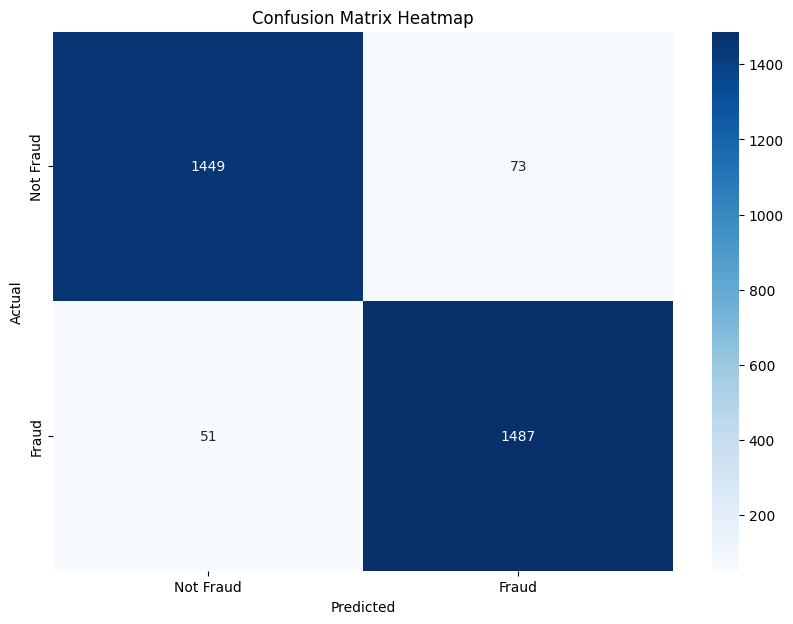

In [36]:
# Create a heatmap of the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d',cmap = 'Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()